### 21.Muh Aditya Pahlevi Syawal-220907502053


### Import Library

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.stats.diagnostic import het_breuschpagan

# UJi Autokorelasi
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# UJI Heteroskedastisitas 
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# UJI Mulikolonieritas
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Algortima Regresi dengan paket STATMODEL
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Load Data Via URL (Github)¶

In [58]:
data_adit = pd.read_csv('https://raw.githubusercontent.com/paktitohayunanda/muh-apriadi-makmur/main/DATA_ADIT.csv')
data_adit.drop(['Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [59]:
data_adit

,X1,X2,Y
0,50,20,60
1,40,25,55
2,60,30,65
3,55,35,70
4,45,40,62
5,65,50,75
6,70,55,80
7,75,60,85
8,80,65,90
9,90,70,95


In [26]:
# Variable Prediktor
X = data_adit[['X1','X2']]

# Variable Target
y = data_adit['Y']

### Membuat Model Regression

In [27]:
regressi = LinearRegression()
regressi.fit(X,y)

LinearRegression()

### Menampilkan koefisien dan intercept dari model regressi yang kita buat sebelumnya


In [28]:
coef_x1 = regressi.coef_[0]
coef_x2 = regressi.coef_[1]
intercept = regressi.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

Koefisien X1: 0.39526038633046745
Koefisien X2: 0.20874499972822516
Intercept: 34.08411313532296


### Menampilkan tabel Summary

In [29]:
# Menambahkan kolom konstanta (intercept)
data_adit = sm.add_constant(data_adit)
# Membentuk model regresi
model = sm.OLS(data_adit['Y'], data_adit[['const', 'X1', 'X2']])
# Melakukan fitting model
results = model.fit()
# Menampilkan persamaan regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     9.399
Date:                Mon, 16 Oct 2023   Prob (F-statistic):            0.00258
Time:                        22:19:36   Log-Likelihood:                -61.001
No. Observations:                  17   AIC:                             128.0
Df Residuals:                      14   BIC:                             130.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0841      9.192      3.708      0.0

### Menampilkan Visual Menggunakan Scatter Axes3D

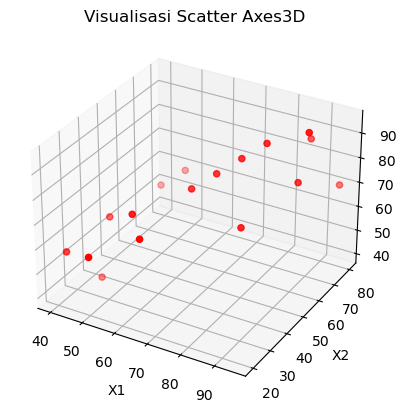

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_adit['X1'], data_adit['X2'], data_adit['Y'], c='r', marker='o')
plt.title('Visualisasi Scatter Axes3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Scatter Axes3D')
plt.show()

### Prediksi hasil regresi untuk plot permukaan

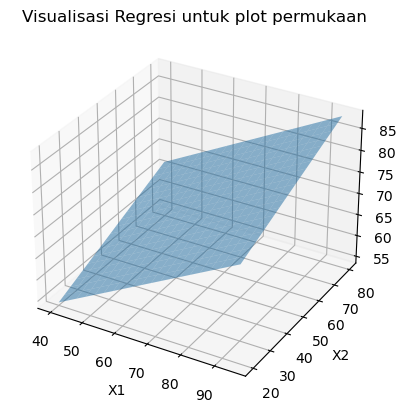

In [31]:
x1_range = np.linspace(data_adit['X1'].min(), data_adit['X1'].max(), 20)
x2_range = np.linspace(data_adit['X2'].min(), data_adit['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

data_to_predict = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_pred = regressi.predict(data_to_predict)
y_pred = y_pred.reshape(x1_mesh.shape)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

plt.title('Visualisasi Regresi untuk plot permukaan')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Regresi untuk plot permukaan')
plt.show()

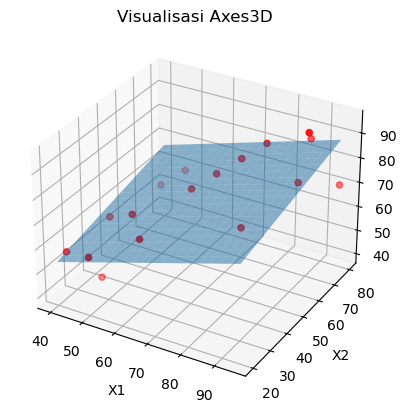

In [33]:
x1_range = np.linspace(data_adit['X1'].min(), data_adit['X1'].max(), 20)
x2_range = np.linspace(data_adit['X2'].min(), data_adit['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

data_to_predict = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_pred = regressi.predict(data_to_predict)
y_pred = y_pred.reshape(x1_mesh.shape)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_adit['X1'], data_adit['X2'], data_adit['Y'], c='r', marker='o')
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

plt.title('Visualisasi Axes3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Axes3D')
plt.show()

### Uji Autokorelasi With Plot ACF

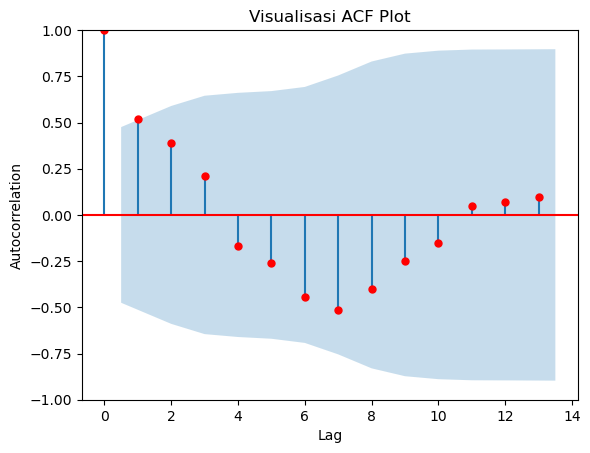

In [35]:
fig, ax = plt.subplots()
plot_acf(data_adit['Y'], ax=ax, color='r')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.title('Visualisasi ACF Plot')

plt.savefig('Visualisasi ACF Plot')
plt.show()


### Uji Heteroskedastisitas

In [36]:
X = data_adit[['X1','X2']]
y = data_adit['Y']

X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result_het_white_test = het_white(result.resid, X)
print(result_het_white_test)

(4.689113037586896, 0.4549860438118728, 0.8379614494217629, 0.5496386898218906)


### Uji Multikolinieritas

In [60]:
Vrince_inflation_factor = pd.DataFrame()
Vrince_inflation_factor['VIF'] = [variance_inflation_factor(data_adit.values, i) for i in range(data_adit.shape[1])]
Vrince_inflation_factor.set_index(data_adit.columns, inplace=True)

print(Vrince_inflation_factor)

          VIF
X1  50.881537
X2  26.182571
Y   34.601622
